In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 한글 폰트 설치

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
batter_file_path = '../content/drive/MyDrive/Donuts/start/ml/batter_stats.csv' # 타자 기록 data, STATIZ 사이트 웹 크롤링 http://www.statiz.co.kr/main.php
batter = pd.read_csv(batter_file_path, encoding='cp949') # 인코딩 오류 - encoding='cp949' 추가하여 해결

In [ ]:
batter.columns

Index(['이름', '팀', '정렬 WAR*', 'G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런',
       '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비',
       '비율 타율', '비율 출루', '비율 장타', '비율 OPS', '비율 wOBA', '비율 wRC+(2022 전)',
       '비율 wRC+(2022)', '비율 wRC+(2023)', 'WAR*', 'WPA'],
      dtype='object')

In [ ]:
batter.head()

,이름,팀,정렬 WAR*,G,타석,타수,득점,안타,2타,3타,...,비율 타율,비율 출루,비율 장타,비율 OPS,비율 wOBA,비율 wRC+(2022 전),비율 wRC+(2022),비율 wRC+(2023),WAR*,WPA
0,노시환,한화,6.93,131,595,514,85,153,30,1,...,0.298,0.388,0.541,0.929,0.418,146.2,146.2,159.3,6.93,4.25
1,김혜성,키움,6.19,137,621,556,104,186,29,6,...,0.335,0.396,0.446,0.842,0.392,140.3,140.3,142.1,6.19,2.50
2,최정,SSG,5.78,128,552,471,94,140,31,0,...,0.297,0.388,0.548,0.936,0.418,NaN,NaN,155.8,5.78,2.80
3,양의지,두산,5.40,129,509,438,56,134,23,0,...,0.306,0.397,0.475,0.872,0.399,119.2,119.2,151.9,5.40,0.59
4,오스틴,LG,5.22,139,583,520,87,163,29,4,...,0.313,0.376,0.517,0.893,0.405,107.1,107.1,154.4,5.22,2.92


In [ ]:
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 한글 폰트(그래프)

In [ ]:
batter['비율 wRC+(2023)'].describe()

count    100.000000
mean     113.912000
std       24.867293
min       68.100000
25%       96.375000
50%      110.750000
75%      125.850000
max      208.200000
Name: 비율 wRC+(2023), dtype: float64

<Axes: >

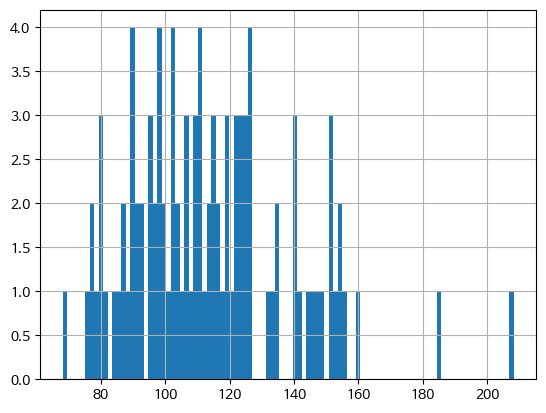

In [ ]:
batter['비율 wRC+(2023)'].hist(bins=100) # 히스토그램 분포

In [ ]:
batter_wRC_df = batter[['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타',
       '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '비율 타율', '비율 출루',
       '비율 장타', '비율 OPS', '비율 wOBA', '비율 wRC+(2022 전)', '비율 wRC+(2023)', 'WAR*', 'WPA']]

In [ ]:
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)

    for i in range(len(df.columns)): # df의 column 갯수 만큼의 subplot을 출력
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

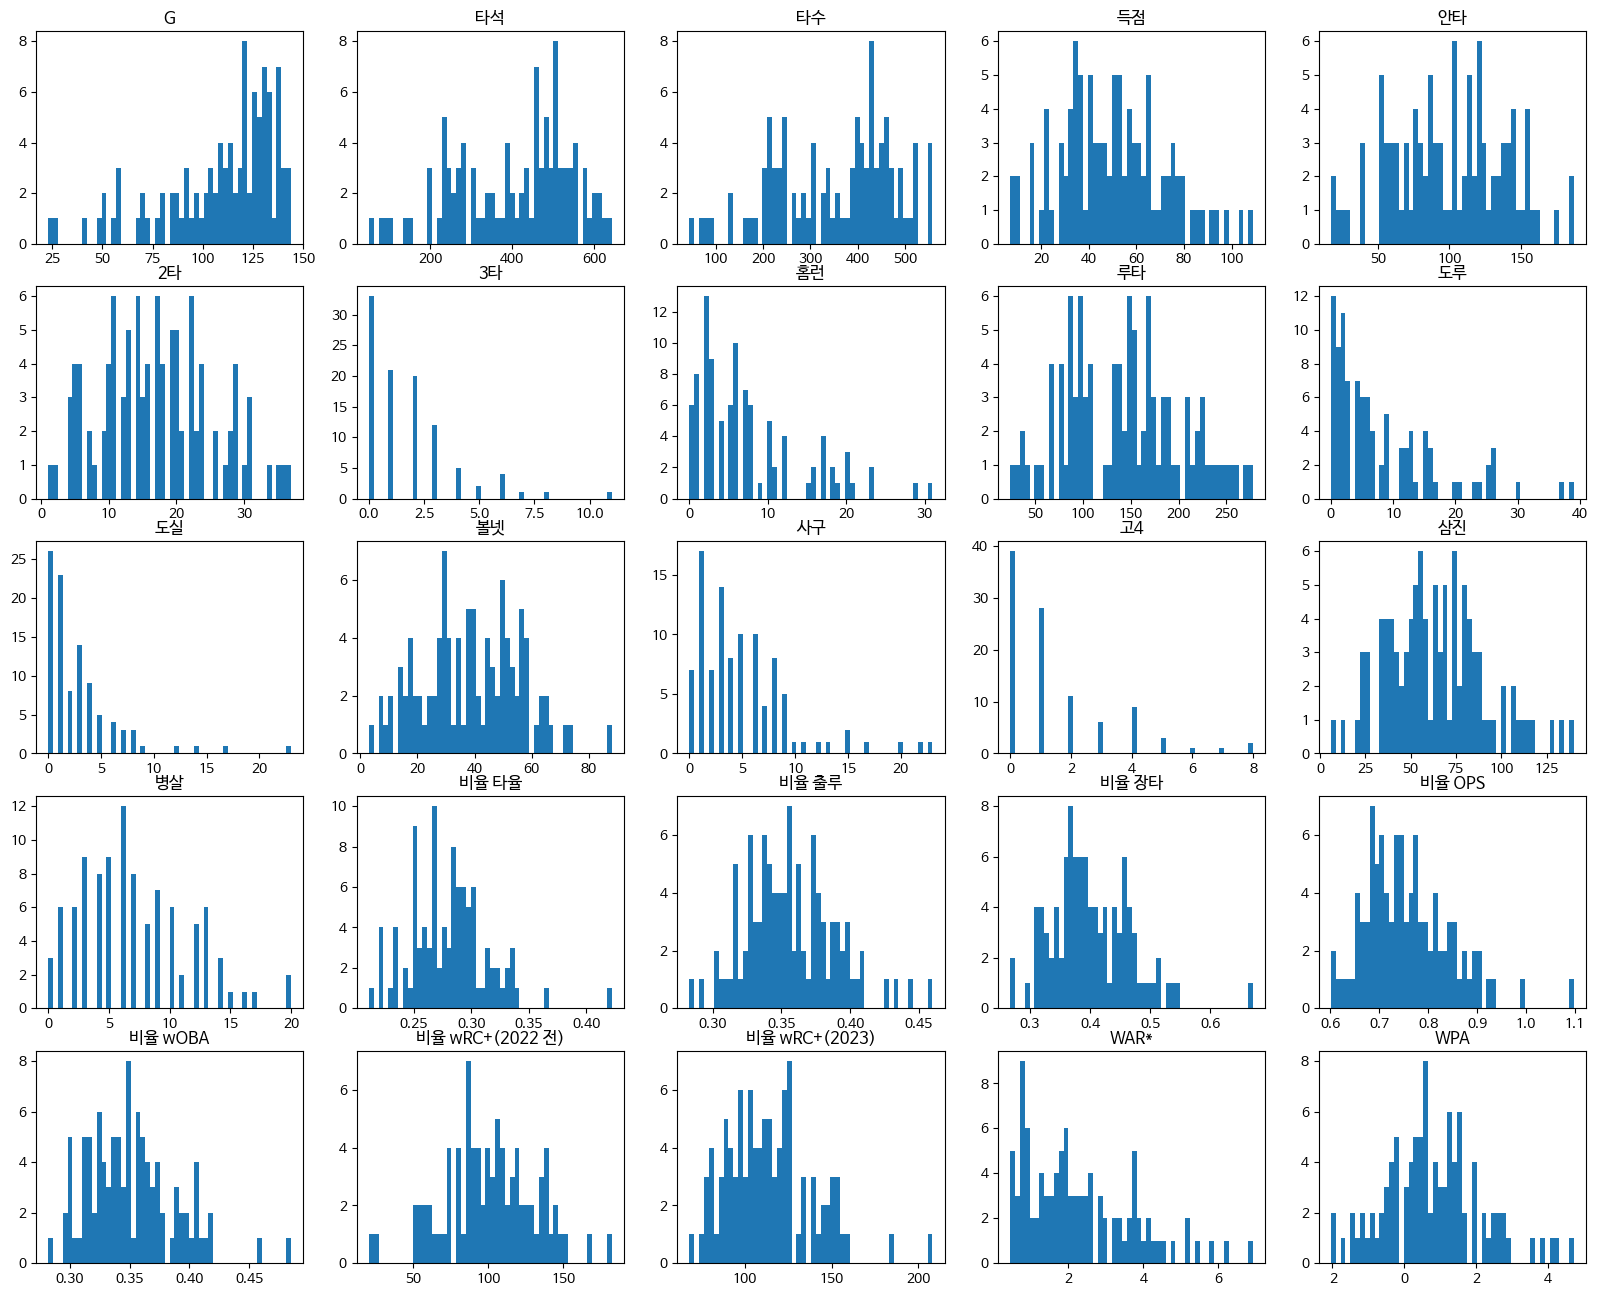

In [ ]:
plot_hist_each_column(batter_wRC_df) # 히스토그램 분포에서 비율 wRC+와 분포가 유사한 것은 비율 출루, 비율 장타, 비율 OPS, 비율 wOBA, 안타라는 것 확인

In [ ]:
pd.options.mode.chained_assignment = None # float 형태로

In [ ]:
def standard_scaling(df, scale_columns): # scailing 함수
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [ ]:
scale_columns = ['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타',
       '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '비율 타율', '비율 출루',
       '비율 장타', '비율 OPS', '비율 wOBA', '비율 wRC+(2022 전)', 'WAR*', 'WPA']
batter_df = standard_scaling(batter, scale_columns) # 각 column에 대하여 scaling 수행

In [ ]:
batter_df = batter_df.rename(columns={'비율 wRC+(2023)': 'y'}) # 예측하려는 부분('비율 wRC+(2023)' column) 'y'로
batter_df.head(5)

,이름,팀,정렬 WAR*,G,타석,타수,득점,안타,2타,3타,...,비율 타율,비율 출루,비율 장타,비율 OPS,비율 wOBA,비율 wRC+(2022 전),비율 wRC+(2022),y,WAR*,WPA
0,노시환,한화,6.93,0.780334,1.352193,1.299191,1.593480,1.372218,1.565819,-0.381306,...,0.519633,0.964432,2.119680,1.960024,1.824953,1.478484,146.2,159.3,3.208471,2.567963
1,김혜성,키움,6.19,0.993152,1.536996,1.638468,2.461488,2.219901,1.445371,2.094707,...,1.617030,1.208902,0.672747,0.962002,1.112509,1.283793,140.3,142.1,2.695925,1.266165
2,최정,SSG,5.78,0.673925,1.046556,0.951835,2.004642,1.038283,1.686266,-0.876508,...,0.489973,0.964432,2.226296,2.040324,1.824953,NaN,NaN,155.8,2.411947,1.489330
3,양의지,두산,5.40,0.709395,0.740920,0.685260,0.268626,0.884159,0.722685,-0.876508,...,0.756908,1.239460,1.114443,1.306147,1.304321,0.587527,119.2,151.9,2.148747,-0.154654
4,오스틴,LG,5.22,1.064092,1.266899,1.347659,1.684849,1.629092,1.445371,1.104302,...,0.964524,0.597728,1.754139,1.547049,1.468731,0.188246,107.1,154.4,2.024074,1.578597


In [ ]:
team_encoding = pd.get_dummies(batter_df['팀']) # 10개 팀을 one-hot encoding으로 변환
batter_df = batter_df.drop('팀', axis=1)
batter_df = batter_df.join(team_encoding)

In [ ]:
team_encoding.head(5)

,KIA,KT,LG,NC,SSG,두산,롯데,삼성,키움,한화
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [ ]:
batter_df.head(5)

,이름,정렬 WAR*,G,타석,타수,득점,안타,2타,3타,홈런,...,KIA,KT,LG,NC,SSG,두산,롯데,삼성,키움,한화
0,노시환,6.93,0.780334,1.352193,1.299191,1.593480,1.372218,1.565819,-0.381306,3.451101,...,0,0,0,0,0,0,0,0,0,1
1,김혜성,6.19,0.993152,1.536996,1.638468,2.461488,2.219901,1.445371,2.094707,-0.079437,...,0,0,0,0,0,0,0,0,1,0
2,최정,5.78,0.673925,1.046556,0.951835,2.004642,1.038283,1.686266,-0.876508,3.156889,...,0,0,0,0,1,0,0,0,0,0
3,양의지,5.40,0.709395,0.740920,0.685260,0.268626,0.884159,0.722685,-0.876508,1.391620,...,0,0,0,0,0,1,0,0,0,0
4,오스틴,5.22,1.064092,1.266899,1.347659,1.684849,1.629092,1.445371,1.104302,2.274255,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
batter_df = batter_df.dropna(axis=0) # 결측값이 0인 행 삭제
print(batter_df.shape)

(77, 41)


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X = batter_df[batter_df.columns.difference(['이름', 'y'])]
y = batter_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19) # train data : test data = 8 : 2

In [ ]:
lr = linear_model.LinearRegression() # 회귀 모델 학습
model = lr.fit(X_train, y_train)

In [ ]:
print(lr.coef_) # 회귀 분석 계수 출력

[ 3.73699841e+11  1.81789231e+11 -1.32253819e+00  1.56900990e+00
 -3.52909625e+00  4.14646900e+00 -1.24097261e+00  2.23121499e-01
  5.22752658e-01 -9.89535202e-01 -1.65240219e-01 -1.26093649e+00
 -5.32647318e-01  2.03420574e+00  2.93674219e-01 -3.47198593e-01
 -2.68013390e+12 -3.52711896e-02 -5.11421510e-01 -4.11368714e+01
  1.85906572e+01  7.00031162e-03 -8.23160639e-03  3.48058473e+01
  1.88988304e+01 -5.74015419e-01 -1.91763695e-02 -2.45066437e+00
  1.28731558e+00  1.75227258e+12  7.46440170e-01  2.21256094e-01
  2.63355061e-03  7.95383453e-02 -7.65533447e-02 -6.60612702e-01
  9.17936447e+11  2.70843506e-04 -1.81736946e-01]


In [ ]:
!pip install statsmodels
import statsmodels.api as sm
# statsmodel 라이브러리로 회귀 분석

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     684.5
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           2.78e-31
Time:                        03:31:52   Log-Likelihood:                -73.810
No. Observations:                  61   AIC:                             217.6
Df Residuals:                      26   BIC:                             291.5
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.4117      0.192     43.745      0.000       8.016       8.807
2타                 -1.6260      0.781     -2.082      0.047      -3.231      -0.021
3타                 -0.3870      0.353     -1.096      0.283      -1.113       0.339
G                  -1.3235      0.791     -1.672      0.106      -2.950       0.303
KIA                 2.4141      0.731      3.304      0.003       0.912       3.916
KT                 -2.6847      0.647     -4.150      0.000      -4.015      -1.355
LG                  4.9911      0.837      5.964      0.000       3.271       6.711
NC                 -0.3973      0.558     -0.711      0.483      -1.545       0.751
SSG                 1.0683      0.582      1.837      0.078      -0.127       2.264
WAR*               -8.5277      0.328    -25.998      0.000      -9.202      -7.853
WPA                -0.9899      0.461     -2.147      0.041      -1.938      -0.042
고4                 -0.1651      0.549     -0.301      0.766      -1.293       0.963
도루                 -1.2607      0.478     -2.635      0.014      -2.244      -0.277
도실                 -0.5328      0.463     -1.151      0.260      -1.484       0.419
두산                  2.8787      0.722      3.985      0.000       1.394       4.364
득점                  0.2931      0.789      0.372      0.713      -1.328       1.915
롯데                  0.4975      0.725      0.687      0.498      -0.992       1.987
루타                  1.2040      1.330      0.905      0.374      -1.531       3.939
병살                 -0.0354      0.377     -0.094      0.926      -0.810       0.740
볼넷                 -0.4810      1.340     -0.359      0.723      -3.235       2.273
비율 OPS            -41.1648     53.938     -0.763      0.452    -152.036      69.706
비율 wOBA            18.5887      7.505      2.477      0.020       3.162      34.015
비율 wRC+(2022 전)   -28.1142      0.643    -43.733      0.000     -29.436     -26.793
비율 wRC+(2022)       0.9197      0.017     53.112      0.000       0.884       0.955
비율 장타              34.8290     41.224      0.845      0.406     -49.907     119.565
비율 출루              18.9115     21.698      0.872      0.391     -25.690      63.513
비율 타율              -0.5766      1.527     -0.378      0.709      -3.716       2.563
사구                 -0.0112      0.432     -0.026      0.980      -0.898       0.876
삼성                 -1.6070      0.935     -1.718      0.098      -3.530       0.316
삼진                  1.2878      0.523      2.461      0.021       0.212       2.364
안타                  2.7714      2.195      1.263      0.218      -1.740       7.282
정렬 WAR*             7.0155      0.362     19.355      0.000       6.270       7.761
키움                  1.0665      0.811      1.315      0.200      -0.600       2.733
타석                 -0.2535      1.377     -0.184      0.855

[Text(0, 0, 'const'),
 Text(1, 0, '2타'),
 Text(2, 0, '3타'),
 Text(3, 0, 'G'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'NC'),
 Text(8, 0, 'SSG'),
 Text(9, 0, 'WAR*'),
 Text(10, 0, 'WPA'),
 Text(11, 0, '고4'),
 Text(12, 0, '도루'),
 Text(13, 0, '도실'),
 Text(14, 0, '두산'),
 Text(15, 0, '득점'),
 Text(16, 0, '롯데'),
 Text(17, 0, '루타'),
 Text(18, 0, '병살'),
 Text(19, 0, '볼넷'),
 Text(20, 0, '비율 OPS'),
 Text(21, 0, '비율 wOBA'),
 Text(22, 0, '비율 wRC+(2022 전)'),
 Text(23, 0, '비율 wRC+(2022)'),
 Text(24, 0, '비율 장타'),
 Text(25, 0, '비율 출루'),
 Text(26, 0, '비율 타율'),
 Text(27, 0, '사구'),
 Text(28, 0, '삼성'),
 Text(29, 0, '삼진'),
 Text(30, 0, '안타'),
 Text(31, 0, '정렬 WAR*'),
 Text(32, 0, '키움'),
 Text(33, 0, '타석'),
 Text(34, 0, '타수'),
 Text(35, 0, '타점'),
 Text(36, 0, '한화'),
 Text(37, 0, '홈런'),
 Text(38, 0, '희비'),
 Text(39, 0, '희타')]

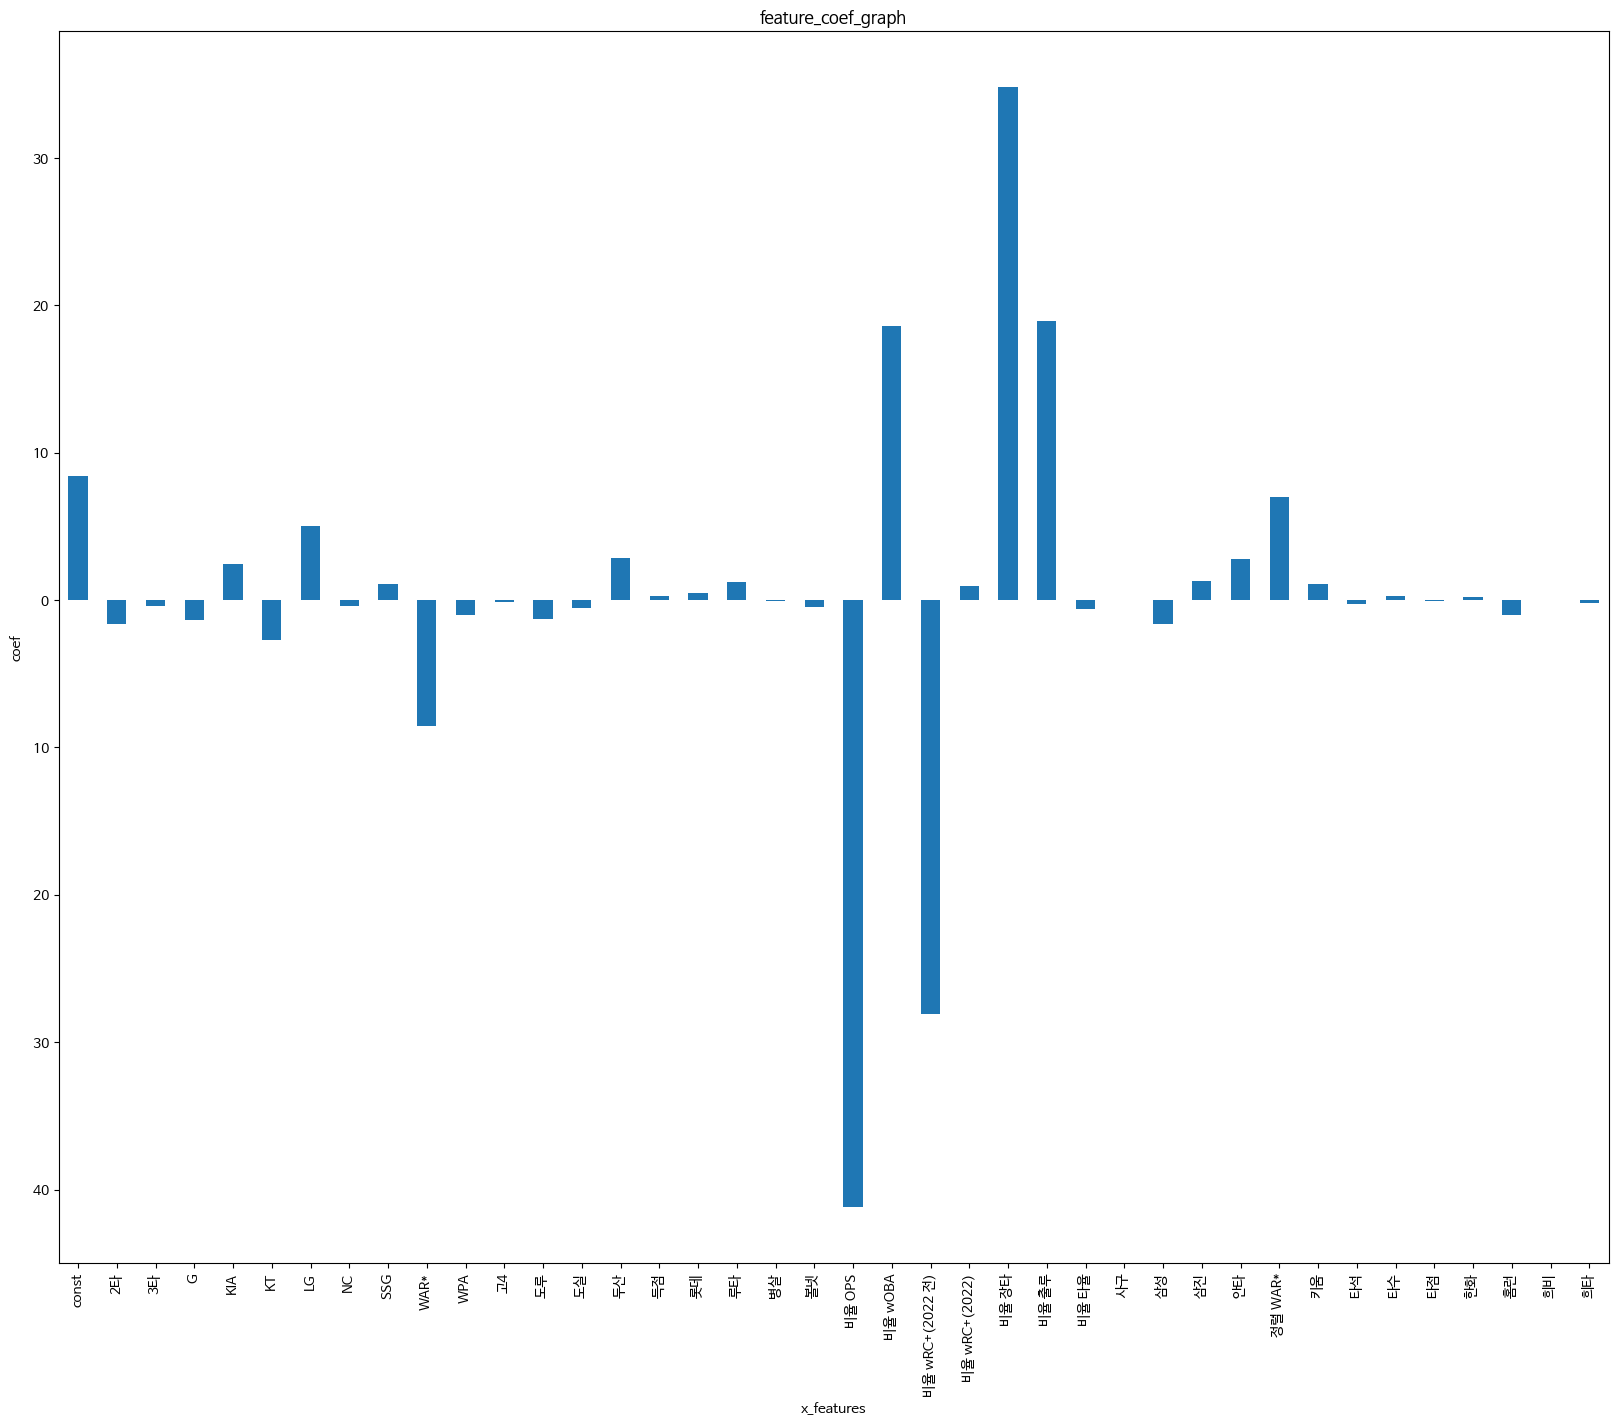

In [ ]:
plt.rcParams['figure.figsize'] = [20, 16]

# 회귀 분석 계수를 리스트 형태로
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트 형태로
x_labels = model.params.index.tolist()

# 회귀 계수 출력
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

In [ ]:
X = batter_df[batter_df.columns.difference(['이름', 'y'])]
y = batter_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
# 회귀 분석 모델을 학습
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [ ]:
# 회귀 분석 모델을 평가
print(model.score(X_train, y_train)) # train R2 score
print(model.score(X_test, y_test)) # test R2 score

0.9988840342748206
0.9651682344993067


In [ ]:
# 가장 큰 영향을 미치는 feature 선정
X = batter_df[['비율 OPS', '비율 wOBA', '비율 장타', '비율 출루', '안타']]
y = batter_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
# 모델 학습
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [ ]:
# 모델 평가
print(model.score(X_train, y_train)) # train R2 score
print(model.score(X_test, y_test)) # test R2 score

0.9939289437912323
0.9746463056497522


In [ ]:
# 2023년 wRC+를 예측하여 '예측 2023 wRC+' column 생성
X = batter_df[['비율 OPS', '비율 wOBA', '비율 장타', '비율 출루', '안타']]
batter_2023_wRC = lr.predict(X)
batter_df['예측 2023 wRC+'] = pd.Series(batter_2023_wRC)

In [ ]:
# 원래의 데이터 프레임 다시 로드
batter_file_path = '../content/drive/MyDrive/Donuts/start/ml/batter_stats.csv'
batter = batter[['이름']]
result_df = batter_df.sort_values(by=['y'], ascending=False)
result_df = result_df.merge(batter, on=['이름'], how='left')
result_df = result_df[['이름', 'y', '예측 2023 wRC+']]
result_df.columns = ['선수명', '실제 2023 wRC+', '예측 2023 wRC+']

result_df = result_df.dropna(axis=0) # 결측값이 0인 행 삭제
print(result_df)

    선수명  실제 2023 wRC+  예측 2023 wRC+
0   나성범         208.2    128.949611
1   노시환         159.3    159.824775
2   오스틴         154.4    151.171789
3   구자욱         153.2    124.148190
4   홍창기         152.0    156.492817
..  ...           ...           ...
66  문현빈          90.8     79.748665
67  최지훈          90.5    109.078859
69  송성문          89.2     75.551203
70  김주원          88.1     99.502858
72  김현준          87.1     98.825732

[64 rows x 3 columns]


<Axes: xlabel='선수명'>

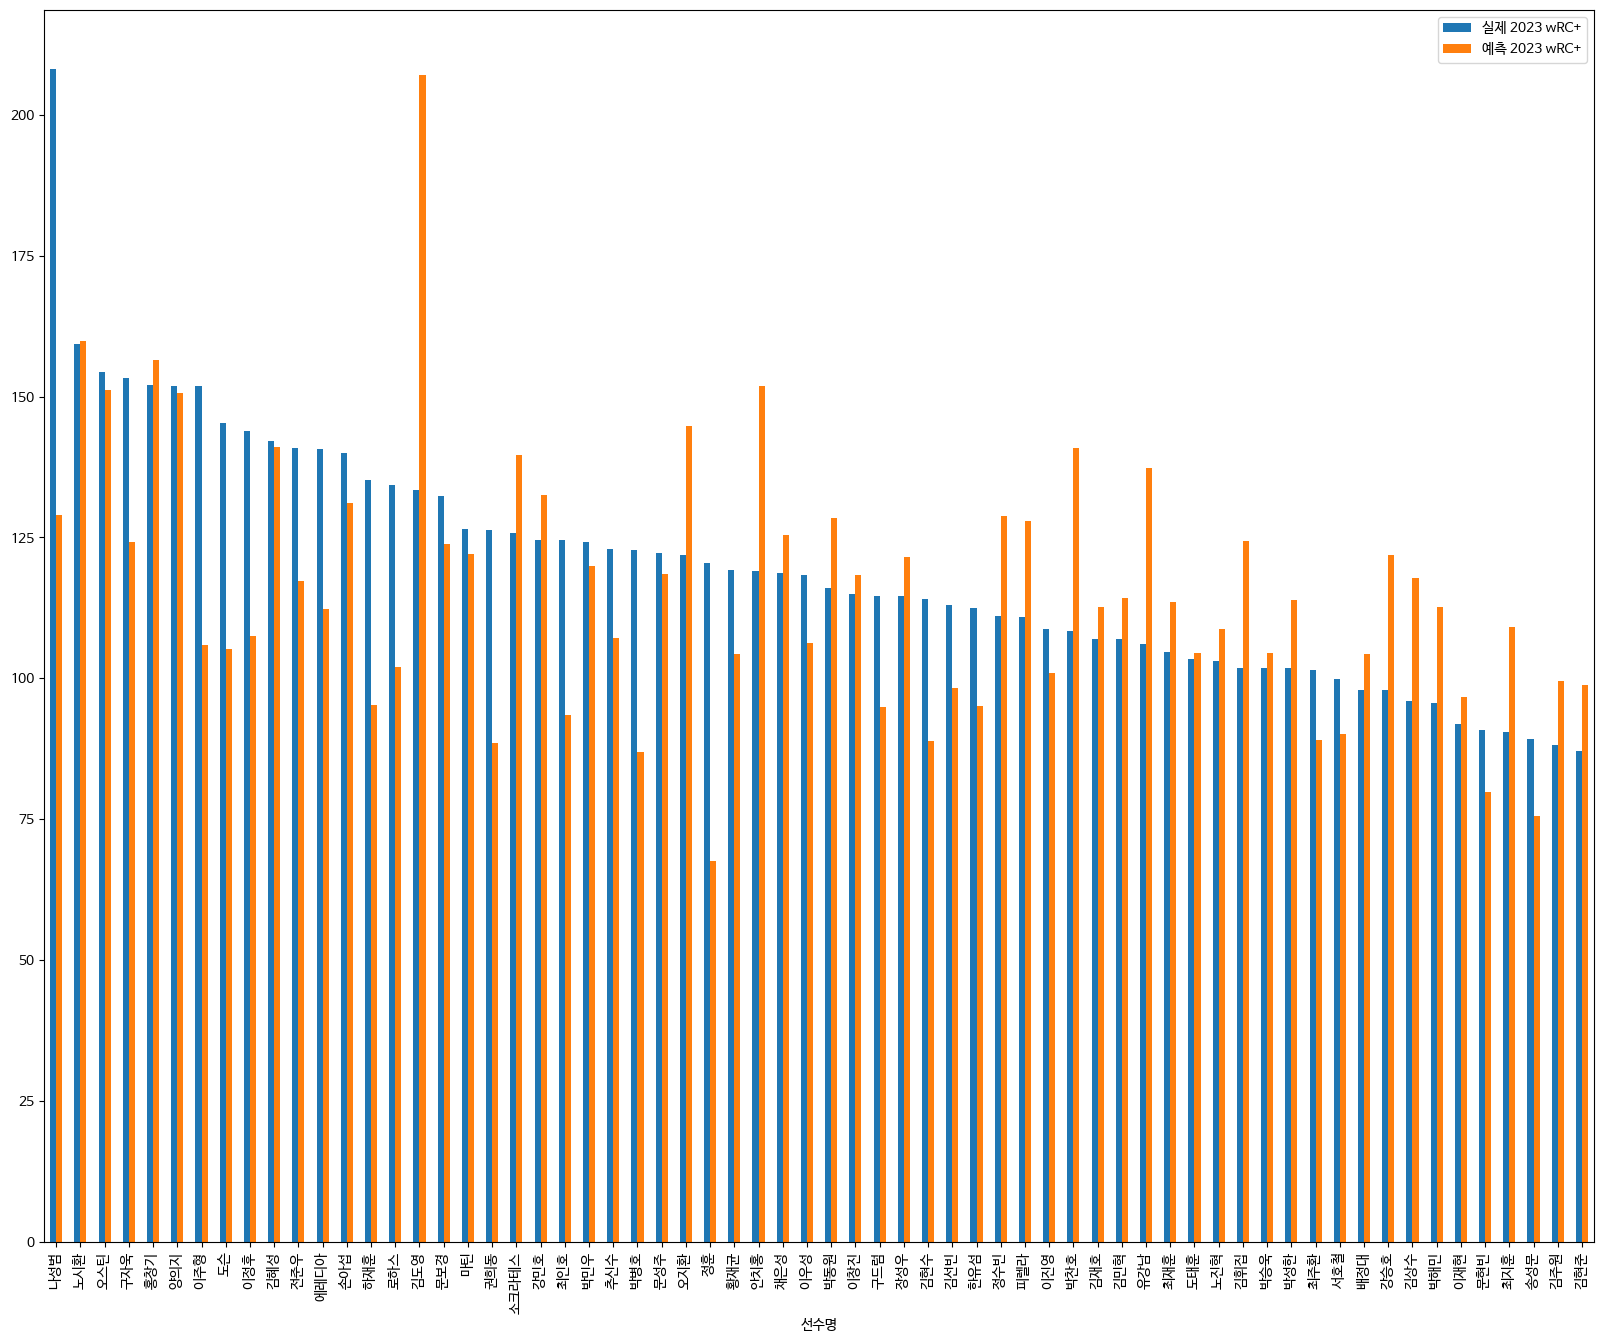

In [ ]:
# 선수별 wRC+ 정보(실제 2023 wRC+, 예측 2023 wRC+)를 bar 그래프로 출력
result_df.plot(x='선수명', y=['실제 2023 wRC+', '예측 2023 wRC+'], kind="bar")